# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
# Example description.
# Mean - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 50% - Median.
# 75% - The 75th percentile value.

dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [4]:
# Check that there are no null-values.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

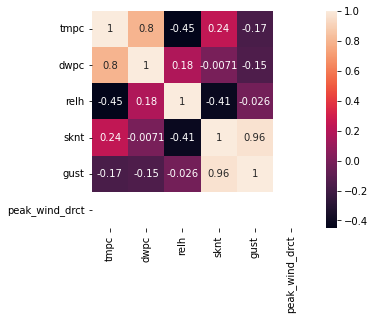

In [5]:
# Example correlation plot.
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_31048\677720991.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


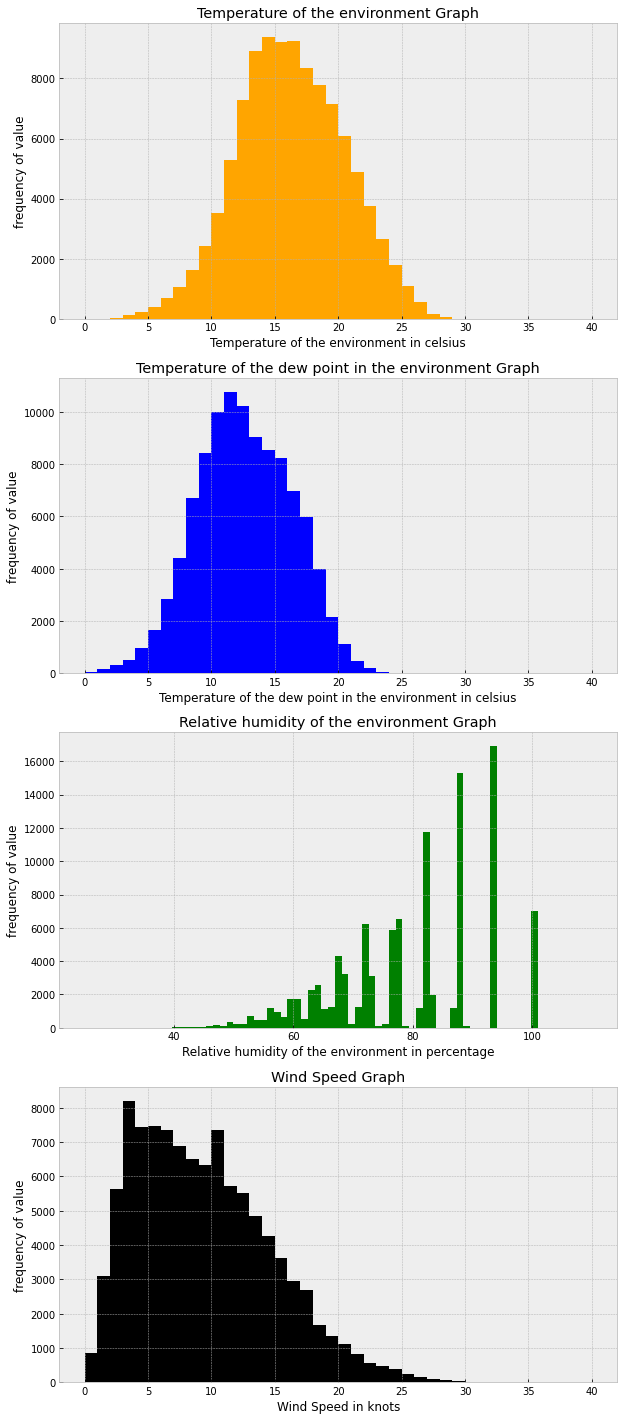

In [6]:
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

ax1.hist(dataset["tmpc"], 40, (0,40), color="orange", histtype = "bar", rwidth = 1)
ax1.set_title("Temperature of the environment Graph")
ax1.set_xlabel("Temperature of the environment in celsius")
ax1.set_ylabel("frequency of value")

ax2.hist(dataset["dwpc"], 40, (0,40), color="blue", histtype = "bar", rwidth = 1)
ax2.set_title("Temperature of the dew point in the environment Graph")
ax2.set_xlabel("Temperature of the dew point in the environment in celsius")
ax2.set_ylabel("frequency of value")

ax3.hist(dataset["relh"], 75, (25,110), color="green", histtype = "bar", rwidth = 1)
ax3.set_title("Relative humidity of the environment Graph")
ax3.set_xlabel("Relative humidity of the environment in percentage")
ax3.set_ylabel("frequency of value")

ax4.hist(dataset["sknt"], 40, (0,40), color="black", histtype = "bar", rwidth = 1)
ax4.set_title("Wind Speed Graph")
ax4.set_xlabel("Wind Speed in knots")
ax4.set_ylabel("frequency of value")

fig.set_size_inches(10,25)

fig.show()

Temperature of the environment Graph:
- the data is normally distruibted
- mean of 15.8 degrees celsius
- min of 2 degrees celsius and max of 29 degrees celsius

Temperature of the dew point in the environment Graph:
- the data is normally distruibted
- mean of 12 degrees celsius
- min of -2 degrees celsius and max of 23 degrees celsius

Relative humidity of the environment Graph:
- the data is very left skewed
- median of 82% relative humidity
- min of 29% and max of 100% relative humidity

Wind Speed Graph:
- the data is very right skewed
- median of 8 knots
- min of 0 knots and max 42 knots

# Data Processing

In [7]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

In [8]:
dataset.drop(columns=["peak_wind_drct", "gust", " station", "valid"], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [9]:
minutesFromStart = []

# make a list that has the number of minutes since the first recording was taken
# every row/data point recorded was taken 30 minutes after the last one was taken
for i in range(len(dataset["tmpc"])):
    minutesFromStart.append(float(i*30))


In [10]:
dataset.insert(0,'Minutes From Start', minutesFromStart )

dataset.head()

,Minutes From Start,tmpc,dwpc,relh,sknt
0,0.0,21.0,11.0,52.77,15.0
1,30.0,21.0,10.0,49.37,16.0
2,60.0,21.0,12.0,56.38,16.0
3,90.0,21.0,13.0,60.21,16.0
4,120.0,21.0,12.0,56.38,16.0


In [11]:
dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Minutes From Start  103713 non-null  float64
 1   tmpc                103678 non-null  float64
 2   dwpc                103678 non-null  float64
 3   relh                103593 non-null  float64
 4   sknt                103704 non-null  float64
dtypes: float64(5)
memory usage: 4.0 MB
        Minutes From Start  tmpc  dwpc   relh  sknt
0                      0.0  21.0  11.0  52.77  15.0
1                     30.0  21.0  10.0  49.37  16.0
2                     60.0  21.0  12.0  56.38  16.0
3                     90.0  21.0  13.0  60.21  16.0
4                    120.0  21.0  12.0  56.38  16.0
...                    ...   ...   ...    ...   ...
103708           3111240.0  19.0  14.0  72.74   5.0
103709           3111270.0  19.0  14.0  72.74   6.0
103710           3111300.0  20.0

In [12]:
trainingSet = dataset[:]
trainingSet.drop(trainingSet.index[0:31115], inplace=True)
print(trainingSet)

        Minutes From Start  tmpc  dwpc   relh  sknt
31115             933450.0   9.0   7.0  87.28   6.0
31116             933480.0   9.0   7.0  87.28   5.0
31117             933510.0   9.0   7.0  87.28   4.0
31118             933540.0   8.0   7.0  93.40   4.0
31119             933570.0   8.0   7.0  93.40   4.0
...                    ...   ...   ...    ...   ...
103708           3111240.0  19.0  14.0  72.74   5.0
103709           3111270.0  19.0  14.0  72.74   6.0
103710           3111300.0  20.0  14.0  68.35   6.0
103711           3111330.0  20.0  14.0  68.35   7.0
103712           3111360.0  22.0  14.0  60.44   6.0

[72598 rows x 5 columns]


C:\Users\joshu\AppData\Local\Temp\ipykernel_31048\1154042695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingSet.drop(trainingSet.index[0:31115], inplace=True)


In [13]:
testSet = dataset[:]
testSet.drop(testSet.index[31115:], inplace=True)
print(testSet)

       Minutes From Start  tmpc  dwpc   relh  sknt
0                     0.0  21.0  11.0  52.77  15.0
1                    30.0  21.0  10.0  49.37  16.0
2                    60.0  21.0  12.0  56.38  16.0
3                    90.0  21.0  13.0  60.21  16.0
4                   120.0  21.0  12.0  56.38  16.0
...                   ...   ...   ...    ...   ...
31110            933300.0  10.0   8.0  87.37   2.0
31111            933330.0  10.0   8.0  87.37   3.0
31112            933360.0   9.0   8.0  93.45   4.0
31113            933390.0   9.0   8.0  93.45   4.0
31114            933420.0   9.0   8.0  93.45   5.0

[31115 rows x 5 columns]


C:\Users\joshu\AppData\Local\Temp\ipykernel_31048\775578315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testSet.drop(testSet.index[31115:], inplace=True)


# Data Modelling

In [14]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.